# Getting information from Investco about its ETF products
* Every ETF has a ticker
* A ticker is used to identify the ETF, so that investors can buy or sell shares through their broker.
* Look up the ticker 'SPY' from this webpage and find the link or URL that shows all of the holdings in excel.
```https://www.ssga.com/us/en/intermediary/etfs/fund-finder```


In [ ]:
tic='XLG' #This is the S&P 500 Investco ETF ticker. We set as a variable so we can change it in a for loop
url=f'https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Investor&action=download&ticker={tic}'
print(url)

https://www.invesco.com/us/financial-products/etfs/holdings/main/holdings/0?audienceType=Investor&action=download&ticker=XLG


## Pandas

* We can use the pandas library to quickly import the CSV
* We have to customize the parameters
  * thousands=',' will remove the comma so that it can translated to a string.
  * Eg. '1,000,000' -> '1000000'
  * Then later, map(float) converts to '1,000,000' -> '1000000' -> 1000000
  



In [ ]:
import pandas as pd
df=pd.read_csv(url, thousands=',')
df=df.loc[df['Class of Shares']=='Common Stock'].set_index('Holding Ticker')               #Select only Equity rows
df["MarketValue"]=df["MarketValue"].map(float) #make sure it is a float and not a string
df.index=df.index.map(lambda s:s.strip())
df.index=df.index.str.strip()

In [ ]:
df

,Fund Ticker,Security Identifier,Shares/Par Value,MarketValue,Weight,Name,Class of Shares,Sector,Date
Holding Ticker,,,,,,,,,
AAPL,XLG,037833100,1763046,3.124999e+08,13.430,Apple Inc,Common Stock,Information Technology,05/31/2023
MSFT,XLG,594918104,882377,2.897638e+08,12.453,Microsoft Corp,Common Stock,Information Technology,05/31/2023
AMZN,XLG,023135106,1056958,1.274480e+08,5.477,Amazon.com Inc,Common Stock,Consumer Discretionary,05/31/2023
NVDA,XLG,67066G104,291677,1.103531e+08,4.743,NVIDIA Corp,Common Stock,Information Technology,05/31/2023
GOOGL,XLG,02079K305,706091,8.675740e+07,3.729,Alphabet Inc,Common Stock,Communication Services,05/31/2023
GOOG,XLG,02079K107,615741,7.596397e+07,3.265,Alphabet Inc,Common Stock,Communication Services,05/31/2023
META,XLG,30303M102,263733,6.981540e+07,3.000,Meta Platforms Inc,Common Stock,Communication Services,05/31/2023
BRK/B,XLG,084670702,213635,6.859393e+07,2.948,Berkshire Hathaway Inc,Common Stock,Financials,05/31/2023
TSLA,XLG,88160R101,318663,6.498495e+07,2.793,Tesla Inc,Common Stock,Consumer Discretionary,05/31/2023


# Groupby

* Let's say we are using the S&P 500 as a proxy for the US Economy
* We want to draw a pie chart to represent the sectors of the economy based on the market value of the stocks in each sector
* Groupby let's us do this quickly


In [ ]:
df.Sector.value_counts()

Information Technology    12
Health Care               11
Communication Services     7
Financials                 6
Consumer Staples           6
Consumer Discretionary     5
Energy                     2
Materials                  1
Industrials                1
Name: Sector, dtype: int64

In [ ]:
df.groupby('Sector').sum()['MarketValue']

<ipython-input-44-0d1814d239d4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Sector').sum()['MarketValue']


Sector
Communication Services    3.022110e+08
Consumer Discretionary    2.670099e+08
Consumer Staples          1.647679e+08
Energy                    8.163427e+07
Financials                2.356018e+08
Health Care               3.213942e+08
Industrials               1.394211e+07
Information Technology    9.203875e+08
Materials                 2.054546e+07
Name: MarketValue, dtype: float64

In [ ]:
(df.groupby('Sector').sum()['MarketValue']/df['MarketValue'].sum()).sort_values()

<ipython-input-45-2eab50813ed1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (df.groupby('Sector').sum()['MarketValue']/df['MarketValue'].sum()).sort_values()


Sector
Industrials               0.005990
Materials                 0.008827
Energy                    0.035074
Consumer Staples          0.070792
Financials                0.101226
Consumer Discretionary    0.114720
Communication Services    0.129844
Health Care               0.138086
Information Technology    0.395441
Name: MarketValue, dtype: float64

<ipython-input-46-152ce958ec5c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Sector').sum()['MarketValue'].plot.pie()


<Axes: ylabel='MarketValue'>

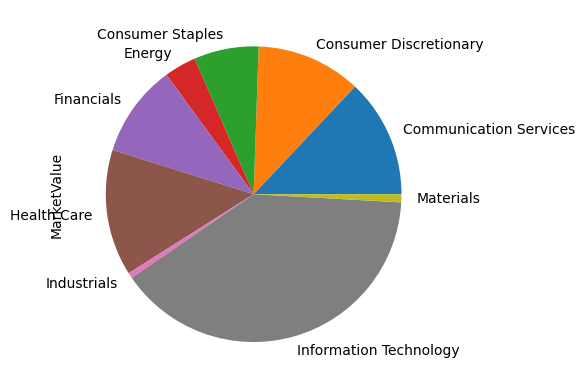

In [ ]:
df.groupby('Sector').sum()['MarketValue'].plot.pie()

# What about historical weights? How do they change over time and why?

![](https://static.seekingalpha.com/uploads/2020/8/3/1112099-15964812265344195_origin.png)



In [ ]:
datastring='''
	2021	2020	2019	2018	2017	2016	2015	2014	2013	2012	2011	2010	2009	2008	2007	2006	2005	2004	2003	2002
Communication Services	15%	14%	14%	13%	13%	13%	13%	10%	38%	33%	33%	32%	35%	26%	34%	27%	26%	16%	5%	5%
Consumer Discretionary	13%	13%	10%	10%	10%	9%	10%	9%	6%	6%	6%	6%	5%	4%	4%	5%	5%	7%	6%	5%
Consumer Staples	6%	7%	8%	8%	9%	10%	10%	10%	7%	8%	9%	8%	8%	10%	7%	8%	8%	10%	12%	13%
Energy	3%	2%	4%	4%	5%	6%	6%	7%	6%	7%	7%	7%	7%	9%	8%	8%	7%	7%	7%	7%
Financials	11%	10%	13%	13%	15%	15%	14%	16%	11%	11%	10%	12%	12%	12%	13%	17%	17%	19%	20%	20%
Health Care	13%	12%	13%	14%	12%	12%	14%	14%	9%	8%	8%	8%	9%	10%	9%	9%	10%	12%	15%	15%
Industrials	7%	8%	8%	8%	9%	10%	9%	10%	7%	7%	7%	8%	7%	8%	8%	9%	10%	11%	12%	12%
Information Technology	25%	26%	23%	22%	19%	17%	16%	16%	11%	14%	13%	12%	12%	13%	10%	11%	11%	13%	17%	16%
Materials	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%	2%
Real Estate	3%	2%	3%	3%	3%	3%	3%	3%	2%	2%	2%	2%	1%	1%	1%	2%	1%	1%	1%	1%
Utilities	2%	2%	3%	3%	3%	3%	3%	3%	2%	2%	3%	2%	2%	3%	3%	3%	3%	3%	3%	3%
'''



In [ ]:
import pandas as pd
df=pd.DataFrame([d.split('\t') for d in datastring.split('\n')][1:])
df.columns=df.iloc[0]
df=df.iloc[1:]
df=df.set_index('')
df=df.iloc[:-1]

In [ ]:
for c in df.columns:
  df[c]=df[c].map(lambda s:float(s[:-1])*0.01)

In [ ]:
df=df.T


NameError: ignored

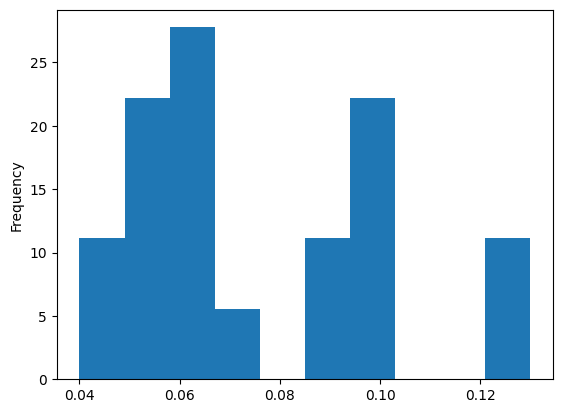

In [ ]:
df['Consumer Discretionary'].plot(kind='hist',density=True)
from scipy.stats import gaussian_kde
# Generate a KDE based on the histogram
kde = gaussian_kde(df['Consumer Discretionary'])

# Generate x-axis values
x_axis = np.linspace(0.03,0.15, num=10)

# Evaluate the PDF at each x-axis value
pdf = kde(x_axis)

# Plot the PDF on top of the histogram
plt.plot(x_axis, pdf, 'r', linewidth=2)


In [ ]:
df['Energy'].mean()

In [ ]:
thisdata=df.loc[df['Energy']>0.062,'Consumer Discretionary']
thisdata.plot(kind='hist',density=True)
from scipy.stats import gaussian_kde
# Generate a KDE based on the histogram
kde = gaussian_kde(thisdata)

# Generate x-axis values
x_axis = np.linspace(0.03,0.15, num=10)

# Evaluate the PDF at each x-axis value
pdf = kde(x_axis)

# Plot the PDF on top of the histogram
plt.plot(x_axis, pdf, 'r', linewidth=2)


In [ ]:
thisdata=df.loc[df['Energy']<0.062,'Consumer Discretionary']
thisdata.plot(kind='hist',density=True)
from scipy.stats import gaussian_kde
# Generate a KDE based on the histogram
kde = gaussian_kde(thisdata)

# Generate x-axis values
x_axis = np.linspace(0.03,0.15, num=10)

# Evaluate the PDF at each x-axis value
pdf = kde(x_axis)

# Plot the PDF on top of the histogram
plt.plot(x_axis, pdf, 'r', linewidth=2)
